# Spatial Analysis of York Region Coyote Sightings

### Data - Gathering and Preprocessing

Data for the Coyote Sightings was obtained from the article by York Region.com. Link Below:
__https://www.yorkregion.com/news/map-coyote-sightings-in-york-region/article_d28bd4fe-a941-58db-8435-5c63c6be46a1.html__

Data for the Dissemination Areas (DA) was obtained from the 2021 Boundary Files through the Government of Canada. Link Below:
__https://www12.statcan.gc.ca/census-recensement/2021/geo/sip-pis/boundary-limites/index-eng.cfm__

Preprocessing of the Census and Sighting Data was completed using QGIS. The census data was processed to only include the Dissemination Areas that fall within York Region. The Coyote Sighting Data was loaded into QGIS to obtain an improved understanding of its fields and rows.

In [31]:
options(warn=1)

In [32]:
#import required libraries
library(rgdal)
library(sp)
library(spatstat)
library(sf)
library(ggplot2)
library(ggmap)
library(ggspatial)
library(patchwork)
library(maptools)
library(tmap)

### Areal Unit Count

Areal units are used to breakdown York region into smaller areas that visualize the dsitribution of coyote sightings. Dissemination Areas were chosen over Forward Sortation Areas due to their specificity of remaining within the Region's borders

In [33]:
#Reads in shapefiles
Sightings2019 <- readOGR("2019 York Region Coyote Sighting.shp", "2019 York Region Coyote Sighting")
Sightings2020 <- readOGR("2020 York Region Coyote Sighting.shp", "2020 York Region Coyote Sighting")
Sightings2021 <- readOGR("2021 York Region Coyote Sighting.shp", "2021 York Region Coyote Sighting")
Sightings2022 <- readOGR("2022 York Region Coyote Sighting.shp", "2022 York Region Coyote Sighting")
Sightings2023 <- readOGR("2023 York Region Coyote Sighting.shp", "2023 York Region Coyote Sighting")
DA <- readOGR("YorkRegionDA.shp", "YorkRegionDA")

Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"


OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\johns\Desktop\Side Projects\Coyote Sighting\NotebookData\2019 York Region Coyote Sighting.shp", layer: "2019 York Region Coyote Sighting"
with 52 features
It has 15 fields
Integer64 fields read as strings:  tessellate extrude visibility drawOrder Year 


Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"


OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\johns\Desktop\Side Projects\Coyote Sighting\NotebookData\2020 York Region Coyote Sighting.shp", layer: "2020 York Region Coyote Sighting"
with 156 features
It has 13 fields
Integer64 fields read as strings:  tessellate extrude visibility drawOrder Year 


Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"


OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\johns\Desktop\Side Projects\Coyote Sighting\NotebookData\2021 York Region Coyote Sighting.shp", layer: "2021 York Region Coyote Sighting"
with 120 features
It has 13 fields
Integer64 fields read as strings:  tessellate extrude visibility drawOrder Year 


Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"


OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\johns\Desktop\Side Projects\Coyote Sighting\NotebookData\2022 York Region Coyote Sighting.shp", layer: "2022 York Region Coyote Sighting"
with 211 features
It has 13 fields
Integer64 fields read as strings:  tessellate extrude visibility drawOrder Year 


Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"


OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\johns\Desktop\Side Projects\Coyote Sighting\NotebookData\2023 York Region Coyote Sighting.shp", layer: "2023 York Region Coyote Sighting"
with 101 features
It has 13 fields
Integer64 fields read as strings:  tessellate extrude visibility drawOrder Year 


Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"


OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\johns\Desktop\Side Projects\Coyote Sighting\NotebookData\YorkRegionDA.shp", layer: "YorkRegionDA"
with 1184 features
It has 4 fields


Regions defined for each Polygons
Using plotunit = 'm'



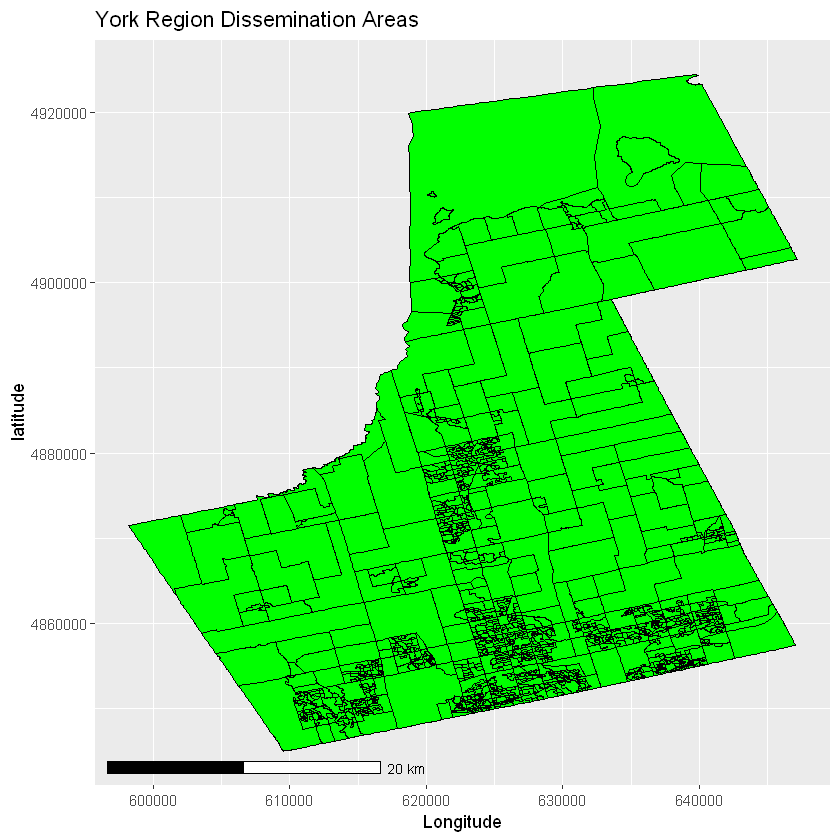

In [34]:
#Plot the Dissemination Area Shapefile
DA_data <- fortify (DA)
Sightings2019_data <- data.frame(Sightings2019)
Sightings2020_data <- data.frame(Sightings2020)
Sightings2021_data <- data.frame(Sightings2021)
Sightings2022_data <- data.frame(Sightings2022)
Sightings2023_data <- data.frame(Sightings2023)

g <- ggplot() + geom_polygon(data = DA_data, aes(x=long, y=lat, group = group), colour ="black", fill ="green") + xlab("Longitude") + ylab("latitude") + ggtitle("York Region Dissemination Areas") + annotation_scale(location = "bl", width_hint = 0.5)
plot(g)

In [35]:
Sightings19_DA <- over(Sightings2019, DA)
Sightings20_DA <- over(Sightings2020, DA)
Sightings21_DA <- over(Sightings2021, DA)
Sightings22_DA <- over(Sightings2022, DA)
Sightings23_DA <- over(Sightings2023, DA)

Sightings19_DA_tabulation <- table(Sightings19_DA$DAUID)
Sightings20_DA_tabulation <- table(Sightings20_DA$DAUID)
Sightings21_DA_tabulation <- table(Sightings21_DA$DAUID)
Sightings22_DA_tabulation <- table(Sightings22_DA$DAUID)
Sightings23_DA_tabulation <- table(Sightings23_DA$DAUID)
#print(Sightings19_DA_tabulation)


In [19]:
#2019
print("2019")
print(paste("Total Number of Dissemination Areas =", nrow(DA), "."))
print(paste("Total number of Coyote Sightings in 2019 =",nrow(Sightings2019), "."))
print(paste("Number of Dissemination Areas with Coyote Sightings =", nrow(Sightings19_DA_tabulation), "."))
print(paste("Number of Dissemination Areas without Coyote Sightings =", nrow(DA) - nrow(Sightings19_DA_tabulation), "."))
print("2019 end")

#2020
print("2020")
print(paste("Total Number of Dissemination Areas =", nrow(DA), "."))
print(paste("Total number of Coyote Sightings in 2020 =",nrow(Sightings2020), "."))
print(paste("Number of Dissemination Areas with Coyote Sightings =", nrow(Sightings20_DA_tabulation), "."))
print(paste("Number of Dissemination Areas without Coyote Sightings =", nrow(DA) - nrow(Sightings20_DA_tabulation), "."))
print("2020 end")
#2021
print("2021")
print(paste("Total Number of Dissemination Areas =", nrow(DA), "."))
print(paste("Total number of Coyote Sightings in 2021 =",nrow(Sightings2021), "."))
print(paste("Number of Dissemination Areas with Coyote Sightings =", nrow(Sightings21_DA_tabulation), "."))
print(paste("Number of Dissemination Areas without Coyote Sightings =", nrow(DA) - nrow(Sightings21_DA_tabulation), "."))
print("2021 end")
#2022
print("2022")
print(paste("Total Number of Dissemination Areas =", nrow(DA), "."))
print(paste("Total number of Coyote Sightings in 2022 =",nrow(Sightings2022), "."))
print(paste("Number of Dissemination Areas with Coyote Sightings =", nrow(Sightings22_DA_tabulation), "."))
print(paste("Number of Dissemination Areas without Coyote Sightings =", nrow(DA) - nrow(Sightings22_DA_tabulation), "."))
print("2022 end")
#2023
print("2023")
print(paste("Total Number of Dissemination Areas =", nrow(DA), "."))
print(paste("Total number of Coyote Sightings in 2023 =",nrow(Sightings2023), "."))
print(paste("Number of Dissemination Areas with Coyote Sightings =", nrow(Sightings23_DA_tabulation), "."))
print(paste("Number of Dissemination Areas without Coyote Sightings =", nrow(DA) - nrow(Sightings23_DA_tabulation), "."))
print("2023 end")

[1] "2019"
[1] "Total Number of Dissemination Areas = 1184 ."
[1] "Total number of Coyote Sightings in 2019 = 52 ."
[1] "Number of Dissemination Areas with Coyote Sightings = 44 ."
[1] "Number of Dissemination Areas without Coyote Sightings = 1140 ."
[1] "2019 end"
[1] "2020"
[1] "Total Number of Dissemination Areas = 1184 ."
[1] "Total number of Coyote Sightings in 2020 = 156 ."
[1] "Number of Dissemination Areas with Coyote Sightings = 109 ."
[1] "Number of Dissemination Areas without Coyote Sightings = 1075 ."
[1] "2020 end"
[1] "2021"
[1] "Total Number of Dissemination Areas = 1184 ."
[1] "Total number of Coyote Sightings in 2021 = 120 ."
[1] "Number of Dissemination Areas with Coyote Sightings = 94 ."
[1] "Number of Dissemination Areas without Coyote Sightings = 1090 ."
[1] "2021 end"
[1] "2022"
[1] "Total Number of Dissemination Areas = 1184 ."
[1] "Total number of Coyote Sightings in 2022 = 211 ."
[1] "Number of Dissemination Areas with Coyote Sightings = 146 ."
[1] "Number of D

In [36]:
Sightings19_DA_df <- data.frame(Sightings19_DA_tabulation)
Sightings20_DA_df <- data.frame(Sightings20_DA_tabulation)
Sightings21_DA_df <- data.frame(Sightings21_DA_tabulation)
Sightings22_DA_df <- data.frame(Sightings22_DA_tabulation)
Sightings23_DA_df <- data.frame(Sightings23_DA_tabulation)

colnames(Sightings19_DA_df) <- c("DAUID", "Sightings2019Count")
colnames(Sightings20_DA_df) <- c("DAUID", "Sightings2020Count")
colnames(Sightings21_DA_df) <- c("DAUID", "Sightings2021Count")
colnames(Sightings22_DA_df) <- c("DAUID", "Sightings2022Count")
colnames(Sightings23_DA_df) <- c("DAUID", "Sightings2023Count")

mergeData19 <- merge(x=DA, y=Sightings19_DA_df, by.x = c("DAUID"), by.y = c("DAUID"), all = TRUE)
mergeData20 <- merge(x=DA, y=Sightings20_DA_df, by.x = c("DAUID"), by.y = c("DAUID"), all = TRUE)
mergeData21 <- merge(x=DA, y=Sightings21_DA_df, by.x = c("DAUID"), by.y = c("DAUID"), all = TRUE)
mergeData22 <- merge(x=DA, y=Sightings22_DA_df, by.x = c("DAUID"), by.y = c("DAUID"), all = TRUE)
mergeData23 <- merge(x=DA, y=Sightings23_DA_df, by.x = c("DAUID"), by.y = c("DAUID"), all = TRUE)

mergeData19[is.na(mergeData19$Sightings2019Count)] <- 0
mergeData20[is.na(mergeData20$Sightings2020Count)] <- 0
mergeData21[is.na(mergeData21$Sightings2021Count)] <- 0
mergeData22[is.na(mergeData22$Sightings2022Count)] <- 0
mergeData23[is.na(mergeData23$Sightings2023Count)] <- 0

summary(mergeData19)
summary(mergeData20)
summary(mergeData21)
summary(mergeData22)
summary(mergeData23)

#print(Sightings19_DA_df)

Object of class SpatialPolygonsDataFrame
Coordinates:
      min     max
x  598190  647177
y 4844989 4924444
Is projected: TRUE 
proj4string :
[+proj=utm +zone=17 +datum=NAD83 +units=m +no_defs]
Data attributes:
    DAUID              DGUID              LANDAREA          PRUID          
 Length:1184        Length:1184        Min.   : 0.0000   Length:1184       
 Class :character   Class :character   1st Qu.: 0.0000   Class :character  
 Mode  :character   Mode  :character   Median : 0.0000   Mode  :character  
                                       Mean   : 0.1747                     
                                       3rd Qu.: 0.0000                     
                                       Max.   :32.5521                     
 Sightings2019Count
 Min.   :0.00000   
 1st Qu.:0.00000   
 Median :0.00000   
 Mean   :0.04392   
 3rd Qu.:0.00000   
 Max.   :4.00000   

Object of class SpatialPolygonsDataFrame
Coordinates:
      min     max
x  598190  647177
y 4844989 4924444
Is projected: TRUE 
proj4string :
[+proj=utm +zone=17 +datum=NAD83 +units=m +no_defs]
Data attributes:
    DAUID              DGUID              LANDAREA          PRUID          
 Length:1184        Length:1184        Min.   : 0.0000   Length:1184       
 Class :character   Class :character   1st Qu.: 0.0000   Class :character  
 Mode  :character   Mode  :character   Median : 0.0000   Mode  :character  
                                       Mean   : 0.2125                     
                                       3rd Qu.: 0.0000                     
                                       Max.   :26.5021                     
 Sightings2020Count
 Min.   :0.0000    
 1st Qu.:0.0000    
 Median :0.0000    
 Mean   :0.1318    
 3rd Qu.:0.0000    
 Max.   :6.0000    

Object of class SpatialPolygonsDataFrame
Coordinates:
      min     max
x  598190  647177
y 4844989 4924444
Is projected: TRUE 
proj4string :
[+proj=utm +zone=17 +datum=NAD83 +units=m +no_defs]
Data attributes:
    DAUID              DGUID              LANDAREA          PRUID          
 Length:1184        Length:1184        Min.   : 0.0000   Length:1184       
 Class :character   Class :character   1st Qu.: 0.0000   Class :character  
 Mode  :character   Mode  :character   Median : 0.0000   Mode  :character  
                                       Mean   : 0.1013                     
                                       3rd Qu.: 0.0000                     
                                       Max.   :19.2182                     
 Sightings2021Count
 Min.   :0.0000    
 1st Qu.:0.0000    
 Median :0.0000    
 Mean   :0.1014    
 3rd Qu.:0.0000    
 Max.   :6.0000    

Object of class SpatialPolygonsDataFrame
Coordinates:
      min     max
x  598190  647177
y 4844989 4924444
Is projected: TRUE 
proj4string :
[+proj=utm +zone=17 +datum=NAD83 +units=m +no_defs]
Data attributes:
    DAUID              DGUID              LANDAREA          PRUID          
 Length:1184        Length:1184        Min.   : 0.0000   Length:1184       
 Class :character   Class :character   1st Qu.: 0.0000   Class :character  
 Mode  :character   Mode  :character   Median : 0.0000   Mode  :character  
                                       Mean   : 0.3598                     
                                       3rd Qu.: 0.0000                     
                                       Max.   :41.3266                     
 Sightings2022Count
 Min.   : 0.0000   
 1st Qu.: 0.0000   
 Median : 0.0000   
 Mean   : 0.1782   
 3rd Qu.: 0.0000   
 Max.   :10.0000   

Object of class SpatialPolygonsDataFrame
Coordinates:
      min     max
x  598190  647177
y 4844989 4924444
Is projected: TRUE 
proj4string :
[+proj=utm +zone=17 +datum=NAD83 +units=m +no_defs]
Data attributes:
    DAUID              DGUID              LANDAREA          PRUID          
 Length:1184        Length:1184        Min.   : 0.0000   Length:1184       
 Class :character   Class :character   1st Qu.: 0.0000   Class :character  
 Mode  :character   Mode  :character   Median : 0.0000   Mode  :character  
                                       Mean   : 0.1939                     
                                       3rd Qu.: 0.0000                     
                                       Max.   :30.0523                     
 Sightings2023Count
 Min.   :0.00000   
 1st Qu.:0.00000   
 Median :0.00000   
 Mean   :0.08446   
 3rd Qu.:0.00000   
 Max.   :6.00000   

In [58]:
#print(mergeData)
#Map the sighting data
map2019 <- tm_shape(mergeData19) + tm_polygons("Sightings2019Count", style="cat", title="Count of 2019 Coyote Sightings\nby Dissemination Area") + tm_legend(outside = TRUE) + tm_compass(north = 0, position = 'left') + tm_scale_bar()
map2020 <- tm_shape(mergeData20) + tm_polygons("Sightings2020Count", style="cat", title="Count of 2020 Coyote Sightings\nby Dissemination Area") + tm_legend(outside = TRUE) + tm_compass(north = 0, position = 'left') + tm_scale_bar()
map2021 <- tm_shape(mergeData21) + tm_polygons("Sightings2021Count", style="cat", title="Count of 2021 Coyote Sightings\nby Dissemination Area") + tm_legend(outside = TRUE) + tm_compass(north = 0, position = 'left') + tm_scale_bar()
map2022 <- tm_shape(mergeData22) + tm_polygons("Sightings2022Count", style="cat", title="Count of 2022 Coyote Sightings\nby Dissemination Area") + tm_legend(outside = TRUE) + tm_compass(north = 0, position = 'left') + tm_scale_bar()
map2023 <- tm_shape(mergeData23) + tm_polygons("Sightings2023Count", style="cat", title="Count of 2023 Coyote Sightings\nby Dissemination Area") + tm_legend(outside = TRUE) + tm_compass(north = 0, position = 'left') + tm_scale_bar()

maps = tmap_arrange(map2019, map2020, map2021, map2022, map2023)
tmap_save(maps, "2019 - 2023 Sighting Heat Map.png", height = 12, width =12 , units = "in", dpi = 1200)

Map saved to C:\Users\johns\Desktop\Side Projects\Coyote Sighting\NotebookData\2019 - 2023 Sighting Heat Map.png

Resolution: 14400 by 14400 pixels

Size: 12 by 12 inches (1200 dpi)



### Calculating Moran's I Statistic

Moran's I is a statistic that describes spatial autocorrelation, the resulting value ranges between -1 to 1. Values closer to -1 show that there is clustering of unalike values. Whereas, values closer to 1 show that there is clustering of alike values. Results closer to 0 signify that there is little to no autocorrelation.

In [39]:
#Install Packages
install.packages("spdep")
install.packages("Rcpp")
library(spdep)

Warning message:
"package 'spdep' is in use and will not be installed"



  There is a binary version available but the source version is later:
     binary   source needs_compilation
Rcpp 1.0.10 1.0.13-1              TRUE

  Binaries will be installed
package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johns\anaconda3\envs\r-studio\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll to C:\Users\johns\anaconda3\envs\r-studio\Lib\R\library\Rcpp\libs\x64\Rcpp.dll: Permission denied"
Warning message:
"restored 'Rcpp'"



The downloaded binary packages are in
	C:\Users\johns\AppData\Local\Temp\RtmpUNQagp\downloaded_packages


In [40]:
#Calculate the neighbouring polygons for all merged data
Sightings2019_DA_nb<-poly2nb(mergeData19, queen = TRUE)
Sightings2020_DA_nb<-poly2nb(mergeData20, queen = TRUE)
Sightings2021_DA_nb<-poly2nb(mergeData21, queen = TRUE)
Sightings2022_DA_nb<-poly2nb(mergeData22, queen = TRUE)
Sightings2023_DA_nb<-poly2nb(mergeData23, queen = TRUE)

In [76]:
#DA_NB_list <- nb2listw(Sightings2019_DA_nb, zero.policy = TRUE)

In [41]:
#Assign Weights to neighbours
nbweights19 <- nb2listw(Sightings2019_DA_nb, style = "W", zero.policy = TRUE)
nbweights20 <- nb2listw(Sightings2020_DA_nb, style = "W", zero.policy = TRUE)
nbweights21 <- nb2listw(Sightings2021_DA_nb, style = "W", zero.policy = TRUE)
nbweights22 <- nb2listw(Sightings2022_DA_nb, style = "W", zero.policy = TRUE)
nbweights23 <- nb2listw(Sightings2023_DA_nb, style = "W", zero.policy = TRUE)

nbweights19$weights[1]
nbweights20$weights[1]
nbweights21$weights[1]
nbweights22$weights[1]
nbweights23$weights[1]

[[1]]
[1] 1

[[1]]
[1] 1

[[1]]
[1] 1

[[1]]
[1] 1

[[1]]
[1] 1

In [44]:
#compute Moran's I stat
I2019 <- moran(mergeData19$Sightings2019Count,nbweights19,length(Sightings2019_DA_nb),Szero(nbweights19))[1]
I2019
I2020 <- moran(mergeData20$Sightings2020Count,nbweights20,length(Sightings2020_DA_nb),Szero(nbweights20))[1]
I2020
I2021 <- moran(mergeData21$Sightings2021Count,nbweights21,length(Sightings2021_DA_nb),Szero(nbweights21))[1]
I2021
I2022 <- moran(mergeData22$Sightings2022Count,nbweights22,length(Sightings2022_DA_nb),Szero(nbweights22))[1]
I2022
I2023 <- moran(mergeData23$Sightings2023Count,nbweights23,length(Sightings2023_DA_nb),Szero(nbweights23))[1]
I2023

$I
[1] 0.08191693

$I
[1] 0.1598371

$I
[1] 0.2280087

$I
[1] 0.07064638

$I
[1] 0.07029858

### Results

Based on the calculated Moran's I values, it can be said that from 2019 - 2023 there is little to no spatial autocorrelation between the coyote sightings. The data collected by the York Region news site is through user reports and submissions. Therefore, the data would be focused more around communities where public participation is high. An improvement to the York Region News' method of collecting data would be to implement ArcGIS Survey123. The ArcGIS Survey123 application allows for the development of a web application which lets users easily report location based information in the form of a questionnare. Furthermore, the use of ArcGIS will also allow for the creation of information dashboards that can relay deeper insights on the status of Coyote Sightings, nesting seasons, and other visualizations that may assist the public.